In [1]:
!pip install numpy matplotlib python-opencv
!pip install ..\.

ERROR: Could not find a version that satisfies the requirement python-opencv (from versions: none)
ERROR: No matching distribution found for python-opencv


Processing c:\users\danii\program\python\project\imgplot2vec
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imgplot2vec: filename=imgplot2vec-0.0.2-py3-none-any.whl size=2763 sha256=a9f80133a5bb6549ca6cf6f52d1098bfe3ec216f10bd04484e217e8d7f1025c2
  Stored in directory: C:\Users\danii\AppData\Local\Temp\pip-ephem-wheel-cache-jejz8ru3\wheels\80\1b\12\a6cbd47a5901888451ae52a27d07e74be1cc9b7825954476a6
Successfully built imgplot2vec
  Attempting uninstall: imgplot2vec
    Found existing installation: imgplot2vec 0.0.2
    Uninstalling imgplot2vec-0.0.2:
      Successfully uninstalled imgplot2vec-0.0.2


In [2]:
import cv2
from imgplot2vec import Reader, Frame, Converter, AutoConverter
import matplotlib.pyplot as plt
import numpy as np

def delta_label(img):
    """
    Подробно смотри в разделе удаление подписи
    """
    delete_lebel_height = 30
    delete_lebel_width = 120
    h,w = img.shape[:2]
    img[:delete_lebel_height, w-delete_lebel_width:, :] = 255

In [19]:

reader = Reader()
converter = Converter()


img = reader.read(r"img/4.png")
delta_label(img)

frame = Frame(x_top_left=22, y_top_left=17, x_bottom_right=1635, y_bottom_right=535,
              x0=3, y0=0, x1=66, y1=3e+08)

vec_y, vec_x = converter.imgplot2vec(img, frame)

[2.49034749e+07 1.79536680e+07 3.00000000e+08 ... 2.10231660e+08
 2.10231660e+08 2.11969112e+08] [0.00000000e+00 3.90576565e-02 7.81153131e-02 ... 6.28828270e+01
 6.29218847e+01 6.29609423e+01]


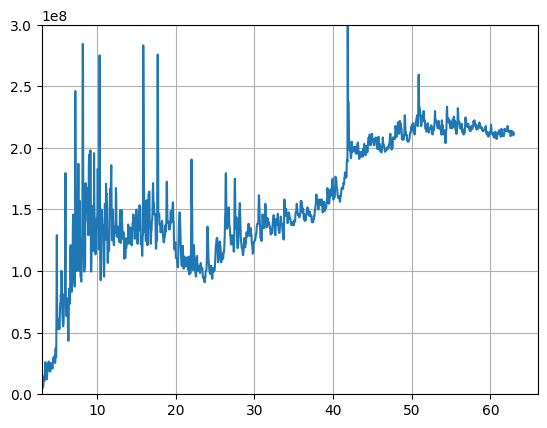

In [20]:
gray_frame = frame.crop_gray(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
print(vec_y, vec_x)
plt.plot(vec_x, vec_y, "-")
plt.grid()
plt.xlim([frame.x0, frame.x1])
plt.ylim([frame.y0, frame.y1])
plt.show()

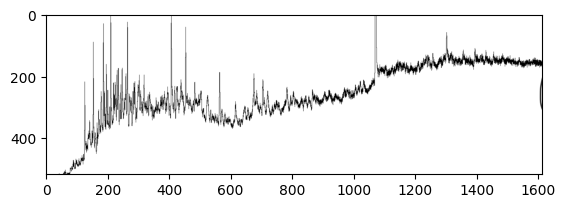

In [21]:
plt.imshow(gray_frame, cmap="gray")

### AutoConverter

In [25]:
reader = Reader()
auto_converter = AutoConverter()

img = reader.read(r"img/4.png")
delta_label(img)

vec_y, vec_x = auto_converter.auto_imgplot2vec(img)

[0.04078014 0.04078014 0.04255319 ... 0.2712766  0.57801418 0.57624113] [0.00000000e+00 5.38793103e-04 1.07758621e-03 ... 9.98383621e-01
 9.98922414e-01 9.99461207e-01]


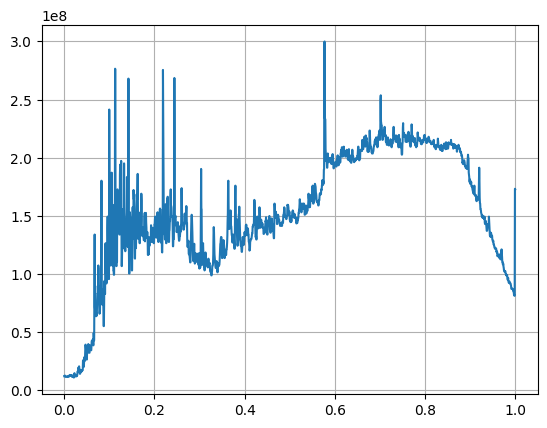

1856

In [28]:
gray_frame = frame.crop_gray(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
print(vec_y, vec_x)
plt.plot(vec_x, vec_y, "-")
plt.grid()
plt.show()
len(vec_y)

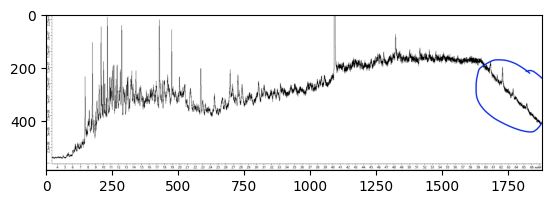

In [27]:
plt.imshow(img, cmap="gray")

### Удаление подписи

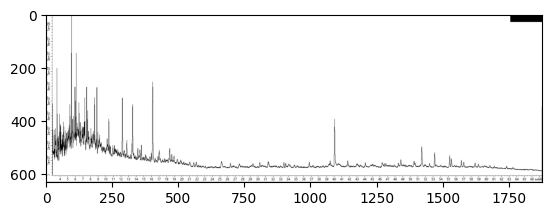

In [9]:
reader = Reader()

img = reader.read(r"img/3.png")

delete_lebel_height = 30
delete_lebel_width = 120
h,w = img.shape[:2]
img[:delete_lebel_height, w-delete_lebel_width:, :] = 0 # для того чтобы понять какая область 0
plt.imshow(img)

### Нормализация вектора к одной длине

In [35]:
reader = Reader()
auto_converter = AutoConverter()

img = reader.read(r"img/4.png")
delta_label(img)

vec_y, vec_x = auto_converter.auto_imgplot2vec(img)

input_AI = 2000
input_vec = np.zeros((input_AI, ))
len_vec =  len(vec_y)
if len_vec > input_AI:
    input_vec = vec_y[:input_AI]
else:
    input_vec[:len_vec] = vec_y

In [39]:
print(input_vec[:10])
print(input_vec[:])
print(input_vec[-10:])

[0.04078014 0.04078014 0.04255319 0.04255319 0.04078014 0.03900709
 0.03900709 0.03900709 0.03900709 0.03900709]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
